# INFO 7374 Machine Learning in Finance
# Mixed Data Sampling(MIDAS) for predicting quaterly Typical Price

## Installing the datareader
### Remote Data Access

Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.

In [4]:
#!pip install pandas_datareader

## Importing all the requried libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)
from math import sqrt
from sklearn.metrics import mean_squared_error

# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

from midas.mix import mix_freq, mix_freq2
from midas.adl import estimate, forecast, midas_adl, rmse, estimate2,forecast2, midas_adl2


In [6]:
!pip install midas

In [4]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 12, 31)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
df_shop = web.DataReader('SHOP', 'yahoo', start, end) 
shop=df_shop
amzn= df_amzn
amzn=amzn.reset_index()
amzn['Date'] = pd.to_datetime(amzn['Date'])
amzn

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013
...,...,...,...,...,...,...,...
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015


In [5]:
shop

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-20,17.000000,17.000000,17.000000,17.000000,0,17.000000
2015-05-21,28.740000,24.110001,28.000000,25.680000,12303900,25.680000
2015-05-22,31.100000,26.000000,26.070000,28.309999,2841200,28.309999
2015-05-26,30.340000,29.080000,29.799999,29.650000,820200,29.650000
2015-05-27,30.809999,27.000000,30.670000,27.500000,797600,27.500000
...,...,...,...,...,...,...
2019-12-24,400.640015,386.140015,389.809998,399.390015,1527300,399.390015
2019-12-26,416.600006,402.399994,402.760010,408.750000,2349800,408.750000
2019-12-27,415.799988,403.109985,411.510010,408.000000,1913300,408.000000


In [21]:
amzn.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
shop.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [22]:
amzn.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03,1510.000000
mean,993.781477,974.209524,984.870748,984.458550,4.172356e+06,984.458550
std,571.857494,560.842867,567.071205,566.579233,2.291493e+06,566.579233
min,290.420013,284.000000,284.399994,286.950012,8.813000e+05,286.950012
25%,444.787498,435.782494,439.577507,439.567513,2.720875e+06,439.567513
50%,821.825012,813.500000,819.200012,818.119995,3.560800e+06,818.119995
75%,1623.350037,1590.832489,1604.000000,1603.029968,4.808650e+06,1603.029968
max,2050.500000,2013.000000,2038.109985,2039.510010,2.385610e+07,2039.510010


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [7]:
amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn['lrets'] = (np.log(amzn.Close) - np.log(amzn.Close.shift(1))) * 100.
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,NaN
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,-0.385192
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.711332
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,1.111598
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.972572


In [8]:
shop['Typical_Price'] = shop[['High','Low','Close']].mean(axis=1)
shop['lrets'] = (np.log(shop.Close) - np.log(shop.Close.shift(1))) * 100.
shop.head()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
Date,,,,,,,,
2015-05-20,17.000000,17.000000,17.000000,17.000000,0,17.000000,17.000000,NaN
2015-05-21,28.740000,24.110001,28.000000,25.680000,12303900,25.680000,26.176667,41.249915
2015-05-22,31.100000,26.000000,26.070000,28.309999,2841200,28.309999,28.470000,9.750259
2015-05-26,30.340000,29.080000,29.799999,29.650000,820200,29.650000,29.690000,4.624703
2015-05-27,30.809999,27.000000,30.670000,27.500000,797600,27.500000,28.436666,-7.527611


In [24]:
amzn.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,1790.786621,-0.211603
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,1846.243327,4.350631
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,1879.070028,0.055103
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015,1857.170003,-1.232835
1509,2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966,1844.443319,0.051422


In [25]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 9 columns):
Date             1510 non-null datetime64[ns]
High             1510 non-null float64
Low              1510 non-null float64
Open             1510 non-null float64
Close            1510 non-null float64
Volume           1510 non-null int64
Adj Close        1510 non-null float64
Typical_Price    1510 non-null float64
lrets            1509 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 106.3 KB


In [26]:
amzn.size

13590

In [27]:
amzn.corr()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
High,1.000000,0.999665,0.999833,0.999780,0.113507,0.999780,0.999899,0.000563
Low,0.999665,1.000000,0.999729,0.999805,0.096590,0.999805,0.999905,0.003704
Open,0.999833,0.999729,1.000000,0.999567,0.107257,0.999567,0.999794,-0.007016
Close,0.999780,0.999805,0.999567,1.000000,0.104311,1.000000,0.999945,0.011259
Volume,0.113507,0.096590,0.107257,0.104311,1.000000,0.104311,0.104866,-0.053022
Adj Close,0.999780,0.999805,0.999567,1.000000,0.104311,1.000000,0.999945,0.011259
Typical_Price,0.999899,0.999905,0.999794,0.999945,0.104866,0.999945,1.000000,0.005166
lrets,0.000563,0.003704,-0.007016,0.011259,-0.053022,0.011259,0.005166,1.000000


In [9]:
shop.corr()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
High,1.000000,0.999577,0.999614,0.999652,0.315330,0.999652,0.999872,0.002392
Low,0.999577,1.000000,0.999551,0.999631,0.302429,0.999631,0.999860,0.005143
Open,0.999614,0.999551,1.000000,0.999059,0.310308,0.999059,0.999534,-0.010130
Close,0.999652,0.999631,0.999059,1.000000,0.308755,1.000000,0.999888,0.016381
Volume,0.315330,0.302429,0.310308,0.308755,1.000000,0.308755,0.308963,0.002145
Adj Close,0.999652,0.999631,0.999059,1.000000,0.308755,1.000000,0.999888,0.016381
Typical_Price,0.999872,0.999860,0.999534,0.999888,0.308963,0.999888,1.000000,0.007959
lrets,0.002392,0.005143,-0.010130,0.016381,0.002145,0.016381,0.007959,1.000000


In [28]:
amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,NaN
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,-0.385192
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.711332
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,1.111598
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.972572


## Calculating daily typical price of AMZN that is mean of (High+Low+Close)¶


In [29]:
amzn['Typical_Price'] = amzn[['High','Low','Close']].mean(axis=1)
amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,NaN
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,-0.385192
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.711332
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,1.111598
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.972572


In [30]:
fama = pd.read_csv('F-F_Research_Data_Factors_daily.CSV')
fama.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.24,-0.28,0.009
1,19260702,0.45,-0.32,-0.08,0.009
2,19260706,0.17,0.27,-0.35,0.009
3,19260707,0.09,-0.59,0.03,0.009
4,19260708,0.21,-0.36,0.15,0.009


In [31]:
fama.tail()

,Date,Mkt-RF,SMB,HML,RF
24806,20200825,0.36,0.15,-0.63,0.0
24807,20200826,1.01,-1.11,-1.74,0.0
24808,20200827,0.18,-0.36,0.99,0.0
24809,20200828,0.70,0.29,-0.21,0.0
24810,20200831,-0.05,-0.44,-1.76,0.0


In [32]:
fama.size

124055

In [33]:
fama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24811 entries, 0 to 24810
Data columns (total 5 columns):
Date      24811 non-null int64
Mkt-RF    24811 non-null float64
SMB       24811 non-null float64
HML       24811 non-null float64
RF        24811 non-null float64
dtypes: float64(4), int64(1)
memory usage: 969.3 KB


In [34]:
#'Date' is an object. Hence, we need to convert it to Date format.¶
fama['Date'] = pd.to_datetime(fama['Date'], format='%Y%m%d')

In [35]:
fama['Date'].dtype

dtype('<M8[ns]')

## ADS index data 


In [36]:
ads = pd.read_excel("ads_vintages-zip.xlsx")
ads

,Date,ADS_Index_010220,ADS_Index_010920,ADS_Index_011020,ADS_Index_011620,ADS_Index_011720,ADS_Index_012320,ADS_Index_013020,ADS_Index_013120,ADS_Index_020620,...,ADS_Index_091520,ADS_Index_091720,ADS_Index_092420,ADS_Index_093020,ADS_Index_100120,ADS_Index_100220,ADS_Index_100820,ADS_Index_101520,ADS_Index_101620,ADS_Index_102220
0,1960-03-01,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22216,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22217,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22218,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22219,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
ads.head()

,Date,ADS_Index_010220,ADS_Index_010920,ADS_Index_011020,ADS_Index_011620,ADS_Index_011720,ADS_Index_012320,ADS_Index_013020,ADS_Index_013120,ADS_Index_020620,...,ADS_Index_091520,ADS_Index_091720,ADS_Index_092420,ADS_Index_093020,ADS_Index_100120,ADS_Index_100220,ADS_Index_100820,ADS_Index_101520,ADS_Index_101620,ADS_Index_102220
0,1960-03-01,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012
2,1960-03-03,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,...,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905,-2.341905
3,1960-03-04,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,...,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746,-2.313746
4,1960-03-05,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,...,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532,-2.284532


In [38]:
ads.tail()

,Date,ADS_Index_010220,ADS_Index_010920,ADS_Index_011020,ADS_Index_011620,ADS_Index_011720,ADS_Index_012320,ADS_Index_013020,ADS_Index_013120,ADS_Index_020620,...,ADS_Index_091520,ADS_Index_091720,ADS_Index_092420,ADS_Index_093020,ADS_Index_100120,ADS_Index_100220,ADS_Index_100820,ADS_Index_101520,ADS_Index_101620,ADS_Index_102220
22216,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22217,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22218,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22219,2020-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22220,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping unwanted columns from ADS data


In [39]:
ADS = ads.loc[:,['Date','ADS_Index_010920']]

In [40]:
ADS

,Date,ADS_Index_010920
0,1960-03-01,-2.395069
1,1960-03-02,-2.369012
2,1960-03-03,-2.341905
3,1960-03-04,-2.313746
4,1960-03-05,-2.284532
...,...,...
22216,2020-12-27,NaN
22217,2020-12-28,NaN
22218,2020-12-29,NaN
22219,2020-12-30,NaN


In [41]:
ADS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22221 entries, 0 to 22220
Data columns (total 2 columns):
Date                22221 non-null datetime64[ns]
ADS_Index_010920    21859 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 347.3 KB


## Merging Amazon data with FAMA AND ADS


In [42]:
amzn_AF = pd.merge(amzn, fama, on='Date')


In [43]:
amzn_AF.head()


,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets,Mkt-RF,SMB,HML,RF
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,NaN,-0.88,-0.28,0.16,0.0
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,-0.385192,0.03,0.36,0.04,0.0
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.711332,-0.34,-0.58,0.28,0.0
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,1.111598,0.68,0.39,-0.39,0.0
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.972572,0.04,0.01,-0.11,0.0


In [44]:
amzn_AF = pd.merge(amzn_AF, ADS, on='Date')
amzn_AF.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets,Mkt-RF,SMB,HML,RF,ADS_Index_010920
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,397.116659,NaN,-0.88,-0.28,0.16,0.0,-0.365855
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,398.456665,-0.385192,0.03,0.36,0.04,0.0,-0.378983
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,393.016673,-0.711332,-0.34,-0.58,0.28,0.0,-0.412198
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,396.930003,1.111598,0.68,0.39,-0.39,0.0,-0.420924
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,400.320007,0.972572,0.04,0.01,-0.11,0.0,-0.428513


In [45]:
amzn_AF.to_csv('merged.csv')

## Resampling daily data to MONTHLY aggregated data¶

In [46]:
amzn_AF.set_index('Date', inplace=True)

In [47]:
month_agg = amzn_AF.resample('M').mean()
month_agg

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets,Mkt-RF,SMB,HML,RF,ADS_Index_010920
Date,,,,,,,,,,,,,
2014-01-31,399.871906,390.549526,395.972858,394.863335,3.857710e+06,394.863335,395.094922,-0.519591,-0.157619,0.045714,-0.100476,0.000,-0.380487
2014-02-28,358.100000,349.200528,354.363158,354.336843,4.368895e+06,354.336843,353.879124,0.049800,0.241579,0.019474,-0.020526,0.000,0.122650
2014-03-31,367.909999,359.169997,365.009520,362.630477,3.583500e+06,362.630477,363.236825,-0.350994,0.022381,-0.086667,0.232857,0.000,0.436126
2014-04-30,326.722380,315.743811,323.132384,321.641426,6.584700e+06,321.641426,321.369206,-0.479793,-0.007143,-0.200952,0.052857,0.000,0.308517
2014-05-31,306.176669,298.795240,302.474285,302.953811,3.741867e+06,302.953811,302.641907,0.130044,0.099048,-0.085714,-0.005238,0.000,0.242648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1810.570007,1778.234092,1799.372265,1793.602722,3.625964e+06,1793.602722,1794.135607,-0.225855,-0.107273,-0.112727,-0.232727,0.007,0.035436
2019-09-30,1812.319501,1784.685992,1801.715997,1799.120996,3.058645e+06,1799.120996,1798.708830,-0.114976,0.072000,-0.046500,0.335500,0.009,-0.364348
2019-10-31,1763.666944,1736.604784,1749.137839,1752.331750,3.059152e+06,1752.331750,1750.867826,0.100884,0.092609,0.012609,-0.087391,0.007,-0.556550


In [48]:
month_agg.head()


,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets,Mkt-RF,SMB,HML,RF,ADS_Index_010920
Date,,,,,,,,,,,,,
2014-01-31,399.871906,390.549526,395.972858,394.863335,3.857710e+06,394.863335,395.094922,-0.519591,-0.157619,0.045714,-0.100476,0.0,-0.380487
2014-02-28,358.100000,349.200528,354.363158,354.336843,4.368895e+06,354.336843,353.879124,0.049800,0.241579,0.019474,-0.020526,0.0,0.122650
2014-03-31,367.909999,359.169997,365.009520,362.630477,3.583500e+06,362.630477,363.236825,-0.350994,0.022381,-0.086667,0.232857,0.0,0.436126
2014-04-30,326.722380,315.743811,323.132384,321.641426,6.584700e+06,321.641426,321.369206,-0.479793,-0.007143,-0.200952,0.052857,0.0,0.308517
2014-05-31,306.176669,298.795240,302.474285,302.953811,3.741867e+06,302.953811,302.641907,0.130044,0.099048,-0.085714,-0.005238,0.0,0.242648


## Calculate log returns for TypicalPrice Month over Month

In [49]:

month_agg['Typical_Price_MOM'] = (np.log(month_agg.Typical_Price) - np.log(month_agg.Typical_Price.shift(1))) * 100.
month_agg['Volume_MOM'] = (np.log(month_agg.Volume) - np.log(month_agg.Volume.shift(1))) * 100.


month_agg

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_MOM,Volume_MOM
Date,,,,,,,,,,,,,,,
2014-01-31,399.871906,390.549526,395.972858,394.863335,3.857710e+06,394.863335,395.094922,-0.519591,-0.157619,0.045714,-0.100476,0.000,-0.380487,NaN,NaN
2014-02-28,358.100000,349.200528,354.363158,354.336843,4.368895e+06,354.336843,353.879124,0.049800,0.241579,0.019474,-0.020526,0.000,0.122650,-11.017065,12.443644
2014-03-31,367.909999,359.169997,365.009520,362.630477,3.583500e+06,362.630477,363.236825,-0.350994,0.022381,-0.086667,0.232857,0.000,0.436126,2.609963,-19.817008
2014-04-30,326.722380,315.743811,323.132384,321.641426,6.584700e+06,321.641426,321.369206,-0.479793,-0.007143,-0.200952,0.052857,0.000,0.308517,-12.246440,60.840880
2014-05-31,306.176669,298.795240,302.474285,302.953811,3.741867e+06,302.953811,302.641907,0.130044,0.099048,-0.085714,-0.005238,0.000,0.242648,-6.004035,-56.516418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,1810.570007,1778.234092,1799.372265,1793.602722,3.625964e+06,1793.602722,1794.135607,-0.225855,-0.107273,-0.112727,-0.232727,0.007,0.035436,-9.044258,8.627591
2019-09-30,1812.319501,1784.685992,1801.715997,1799.120996,3.058645e+06,1799.120996,1798.708830,-0.114976,0.072000,-0.046500,0.335500,0.009,-0.364348,0.254574,-17.014808
2019-10-31,1763.666944,1736.604784,1749.137839,1752.331750,3.059152e+06,1752.331750,1750.867826,0.100884,0.092609,0.012609,-0.087391,0.007,-0.556550,-2.695753,0.016580


In [50]:
month_agg.head()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_MOM,Volume_MOM
Date,,,,,,,,,,,,,,,
2014-01-31,399.871906,390.549526,395.972858,394.863335,3.857710e+06,394.863335,395.094922,-0.519591,-0.157619,0.045714,-0.100476,0.0,-0.380487,NaN,NaN
2014-02-28,358.100000,349.200528,354.363158,354.336843,4.368895e+06,354.336843,353.879124,0.049800,0.241579,0.019474,-0.020526,0.0,0.122650,-11.017065,12.443644
2014-03-31,367.909999,359.169997,365.009520,362.630477,3.583500e+06,362.630477,363.236825,-0.350994,0.022381,-0.086667,0.232857,0.0,0.436126,2.609963,-19.817008
2014-04-30,326.722380,315.743811,323.132384,321.641426,6.584700e+06,321.641426,321.369206,-0.479793,-0.007143,-0.200952,0.052857,0.0,0.308517,-12.246440,60.840880
2014-05-31,306.176669,298.795240,302.474285,302.953811,3.741867e+06,302.953811,302.641907,0.130044,0.099048,-0.085714,-0.005238,0.0,0.242648,-6.004035,-56.516418


In [51]:
month_agg.tail()


,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_MOM,Volume_MOM
Date,,,,,,,,,,,,,,,
2019-08-31,1810.570007,1778.234092,1799.372265,1793.602722,3.625964e+06,1793.602722,1794.135607,-0.225855,-0.107273,-0.112727,-0.232727,0.007,0.035436,-9.044258,8.627591
2019-09-30,1812.319501,1784.685992,1801.715997,1799.120996,3.058645e+06,1799.120996,1798.708830,-0.114976,0.072000,-0.046500,0.335500,0.009,-0.364348,0.254574,-17.014808
2019-10-31,1763.666944,1736.604784,1749.137839,1752.331750,3.059152e+06,1752.331750,1750.867826,0.100884,0.092609,0.012609,-0.087391,0.007,-0.556550,-2.695753,0.016580
2019-11-30,1784.218506,1764.300500,1775.338019,1774.293994,2.603810e+06,1774.293994,1774.271000,0.067479,0.191000,0.039500,-0.090500,0.006,0.162244,1.327807,-16.116205
2019-12-31,1797.109997,1773.846662,1786.190011,1785.772845,3.245219e+06,1785.772845,1785.576501,0.122792,0.130952,0.033810,0.090476,0.007,0.353785,0.635170,22.020709


## Line Charts to check ADS and Fama Factor Trends with Amazon Typical Price

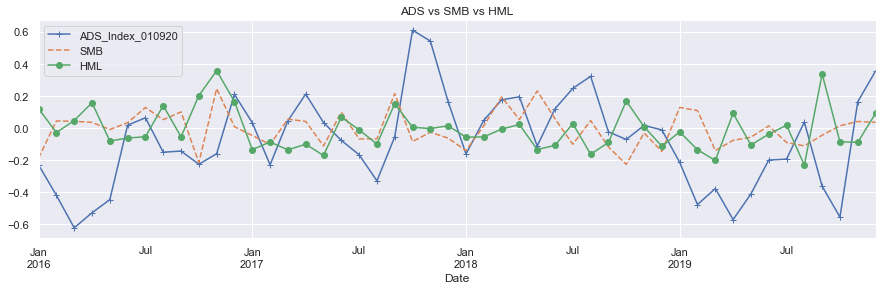

In [52]:
month_agg[['ADS_Index_010920','SMB','HML']].loc['2016-01-04':].plot(figsize=(15,4), style=['-+','--','-o'], 
                                                                    title = 'ADS vs SMB vs HML')

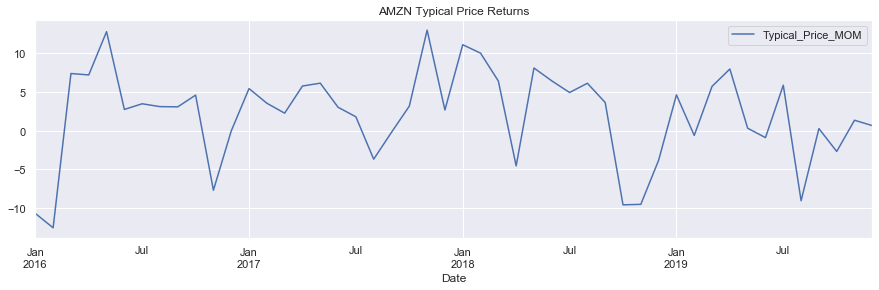

In [54]:
month_agg[['Typical_Price_MOM']].loc['2016-01-04':].plot(figsize=(15,4), style=['-','b'] , 
                                                        title = 'AMZN Typical Price Returns')

#### We can see AMZN trend is most similar to that of ADS index and SMB index, so we would use thes two as high frequency variables to predict AMZN Quaterly returns


## Resampling daily data to Quaterly aggregated data¶



In [55]:
quaterly_agg = amzn_AF.resample('Q').mean()

In [56]:
quaterly_agg
quaterly_agg['Typical_Price_QOQ'] = (np.log(quaterly_agg.Typical_Price) - np.log(quaterly_agg.Typical_Price.shift(1))) * 100.
quaterly_agg.tail()

,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets,Mkt-RF,SMB,HML,RF,ADS_Index_010920,Typical_Price_QOQ
Date,,,,,,,,,,,,,,
2018-12-31,1699.961902,1631.938727,1672.156027,1662.728893,7.576563e+06,1662.728893,1664.876507,-0.456934,-0.246825,-0.138571,0.028413,0.008603,-0.025648,-12.126345
2019-03-31,1679.465586,1644.461478,1660.534420,1664.341315,5.176570e+06,1664.341315,1662.756126,0.279110,0.208525,0.028197,-0.121639,0.009656,-0.353642,-0.127441
2019-06-30,1876.760628,1846.824126,1863.109991,1863.000475,4.035727e+06,1863.000475,1862.195076,0.097557,0.056984,-0.042698,-0.019841,0.009333,-0.398573,11.327940
2019-09-30,1868.458754,1838.824844,1857.009216,1854.548281,3.345648e+06,1854.548281,1853.943960,-0.135881,0.005156,-0.084687,0.030313,0.008313,-0.168735,-0.444070
2019-12-31,1781.062809,1757.479687,1769.483139,1770.167810,2.977911e+06,1770.167810,1769.570102,0.097634,0.135937,0.027969,-0.030000,0.006688,-0.033223,-4.657860


## Model - 1 using Typical Price




In [57]:
AllModel_rmse = []

In [58]:
y, yl, x, yf, ylf, xf = mix_freq(quaterly_agg.Typical_Price_QOQ,month_agg.Typical_Price_MOM, "3m", 1, 3,
                                 start_date=datetime.datetime(2016,1,31),
                                 end_date=datetime.datetime(2018,6,30))

In [59]:
res = estimate(y, yl, x, poly='beta')
res.x

C:\Users\akash\Machine Learning in finance\midas\adl.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(np.concatenate([np.ones((len(xw), 1)), xw.reshape((len(xw), 1)), yl], axis=1), y)[0]


array([13.3550756 ,  2.10966789,  1.2273742 , 13.02602096, -1.07606025])

In [60]:
fc = forecast(xf, ylf, res, poly='beta')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh 
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,17.035060,16.912580,-0.122480
2018-12-31,5.011964,-12.126345,-17.138309
2019-03-31,13.218908,-0.127441,-13.346349
2019-06-30,19.822119,11.327940,-8.494179
2019-09-30,0.331638,-0.444070,-0.775708
2019-12-31,6.012090,-4.657860,-10.669950


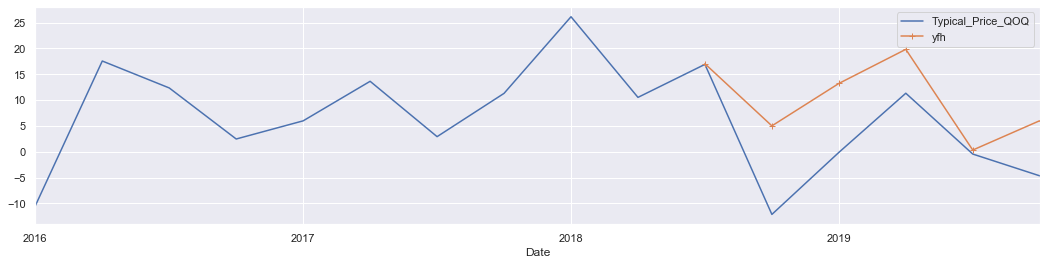

In [61]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(18, 4))


In [62]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

10.475863469708923

In [63]:
AllModel_rmse.append(rmse)
AllModel_rmse

[10.475863469708923]

## Model 2 - considering typical price and change in volume MOM¶




In [64]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Volume_MOM,month_agg.Typical_Price_MOM, "3m","3m", 1, 3,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,6,30))


In [65]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

C:\Users\akash\Machine Learning in finance\midas\adl.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(np.concatenate([np.ones((len(xw1), 1)), xw1.reshape((len(xw1), 1)), xw2.reshape((len(xw2), 1)), yl], axis=1), y)[0]


array([ 10.33593201,  -0.14748601,   5.31940874, -79.31412837,
        19.83174043,  -3.05551387,   0.67853815,  -1.81532813])

In [66]:
fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,9.584323,16.912580,7.328257
2018-12-31,1.098176,-12.126345,-13.224521
2019-03-31,-7.153349,-0.127441,7.025908
2019-06-30,33.734575,11.327940,-22.406635
2019-09-30,1.810887,-0.444070,-2.254957
2019-12-31,13.094956,-4.657860,-17.752816


In [67]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

13.54165982822667

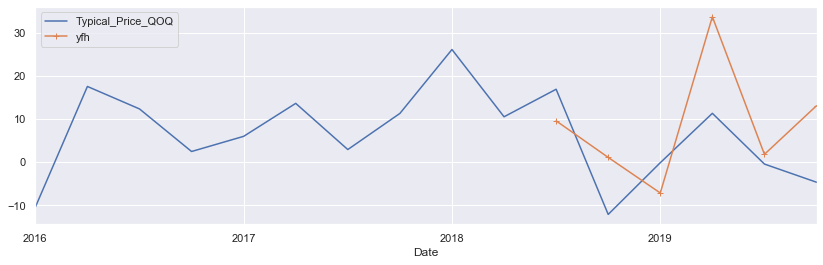

In [68]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))


In [69]:
AllModel_rmse.append(rmse)
AllModel_rmse

[10.475863469708923, 13.54165982822667]

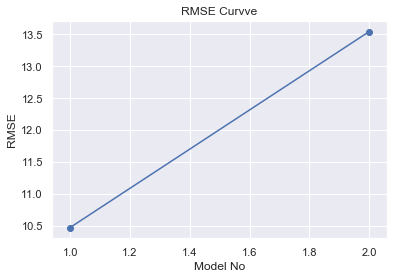

In [70]:
plt.scatter([1,2],list(AllModel_rmse) )
plt.plot([1,2],list(AllModel_rmse))
plt.xlabel('Model No')
plt.ylabel('RMSE')
plt.title('RMSE Curvve')
plt.show()

## Model - 3 - considering Typical Price and ADS index


In [71]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Typical_Price_MOM,month_agg.ADS_Index_010920, "3m","3m", 1, 3,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,6,30))

In [72]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

array([ 15.52712785,   3.44123483,  26.05194104,  30.36171857,
       -10.3480476 ,  -2.59933411,  -7.11212926,  -1.45816026])

In [73]:
fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,27.226076,16.912580,-10.313496
2018-12-31,5.515613,-12.126345,-17.641958
2019-03-31,13.125486,-0.127441,-13.252927
2019-06-30,18.144673,11.327940,-6.816734
2019-09-30,-7.970123,-0.444070,7.526053
2019-12-31,-3.184140,-4.657860,-1.473721


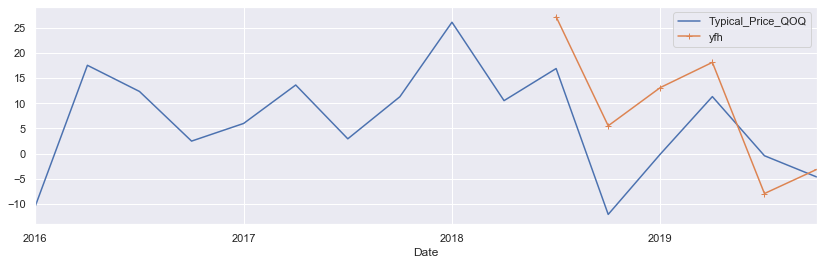

In [74]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [75]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

10.789872856522226

In [76]:
AllModel_rmse.append(rmse)
AllModel_rmse

[10.475863469708923, 13.54165982822667, 10.789872856522226]

### Model 4 - using Typical Price and SMB¶


In [77]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Typical_Price_MOM,month_agg.SMB, "3m","3m", 1, 3,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,6,30))

In [78]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

array([ 12.92436147,  12.30596332, 311.94006595,   1.54063603,
        -0.42326461, 227.59542592, -76.00402915,  -5.85556455])

In [79]:

fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,45.294290,16.912580,-28.381710
2018-12-31,-41.517411,-12.126345,29.391066
2019-03-31,-42.021067,-0.127441,41.893626
2019-06-30,33.646947,11.327940,-22.319007
2019-09-30,-36.903069,-0.444070,36.458999
2019-12-31,-36.638004,-4.657860,31.980143


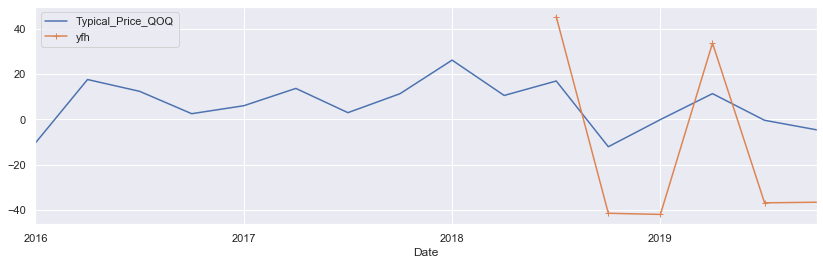

In [80]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [81]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

32.33820871764553

In [82]:
AllModel_rmse.append(rmse)
AllModel_rmse

[10.475863469708923, 13.54165982822667, 10.789872856522226, 32.33820871764553]

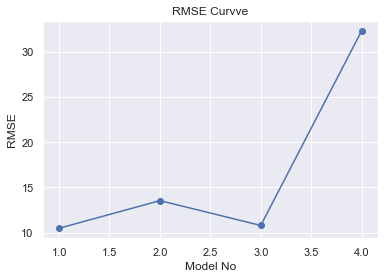

In [83]:
plt.scatter([1,2,3,4],list(AllModel_rmse) )
plt.plot([1,2,3,4],list(AllModel_rmse))
plt.xlabel('Model No')
plt.ylabel('RMSE')
plt.title('RMSE Curvve')
plt.show()

### Checking for Optimum horizons in model 2


In [84]:

y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Volume_MOM,month_agg.Typical_Price_MOM, "3m","3m", 1, 4,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,6,30))

In [85]:
res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

array([18.00458674,  0.17293709,  1.11884278, 26.42185306, -9.3143633 ,
       -4.48090879, -7.26568765, -1.34282057])

In [86]:

fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-09-30,3.768658,16.912580,13.143922
2018-12-31,1.075534,-12.126345,-13.201879
2019-03-31,22.507867,-0.127441,-22.635308
2019-06-30,10.978267,11.327940,0.349673
2019-09-30,4.484084,-0.444070,-4.928154
2019-12-31,9.345210,-4.657860,-14.003070


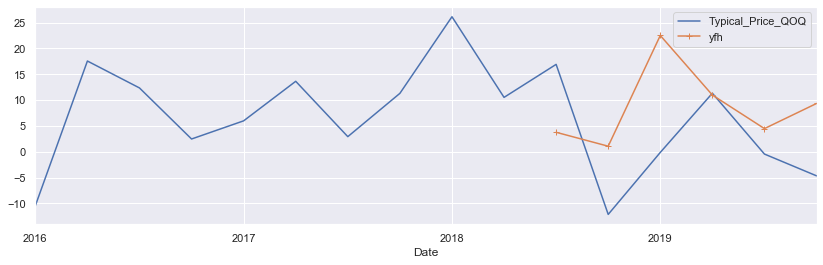

In [87]:
quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [88]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

13.415814224860416

### We can observe by increasing horizon, we do generalize the model around mean and it does not follow the predictive trend,we can chose 3 as optimal horizon¶


### Retaining it for 3 Horizon - Model 2

In [90]:
y, yl, x1, x2, yf, ylf, x1f, x2f =mix_freq2(quaterly_agg.Typical_Price_QOQ,month_agg.Volume_MOM,month_agg.Typical_Price_MOM, "3m","3m", 1, 3,
                                 start_date = datetime.datetime(2016,1,31),
                                 end_date = datetime.datetime(2018,3,31))

In [91]:

res = estimate2(y, yl, x1, x2, poly1='expalmon', poly2='expalmon')
res.x

array([26.66794152, -0.12208882,  2.5361495 , 45.61233267, -8.64443145,
       45.84982224, -9.50341783, -2.82047451])

In [92]:
fc = forecast2(x1f, x2f, ylf, res, poly1='expalmon',poly2='expalmon')
forecast_df = fc.join(yf)
forecast_df['gap'] = forecast_df.Typical_Price_QOQ - forecast_df.yfh  
forecast_df

,yfh,Typical_Price_QOQ,gap
Date,,,
2018-06-30,-26.939694,10.525153,37.464847
2018-09-30,13.051486,16.912580,3.861095
2018-12-31,-7.366618,-12.126345,-4.759727
2019-03-31,31.633811,-0.127441,-31.761252
2019-06-30,30.685071,11.327940,-19.357131
2019-09-30,0.814227,-0.444070,-1.258297
2019-12-31,12.192686,-4.657860,-16.850546


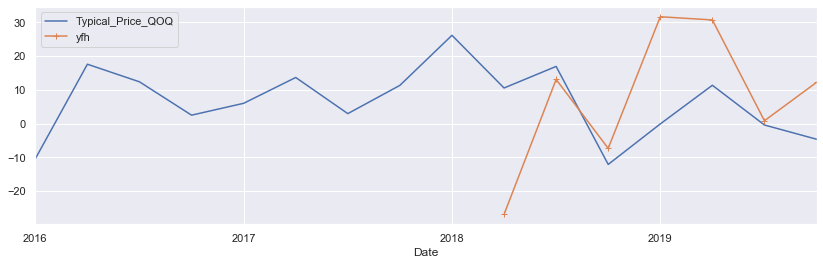

In [93]:

quaterly_agg.join(fc)[['Typical_Price_QOQ','yfh']].loc['2016-1-31':].plot(style=['-','-+'], figsize=(14, 4))

In [94]:
rmse = ((forecast_df.Typical_Price_QOQ - forecast_df.yfh) ** 2).mean() ** .5
rmse

21.078688323762382

In [95]:
forecast_df


,yfh,Typical_Price_QOQ,gap
Date,,,
2018-06-30,-26.939694,10.525153,37.464847
2018-09-30,13.051486,16.912580,3.861095
2018-12-31,-7.366618,-12.126345,-4.759727
2019-03-31,31.633811,-0.127441,-31.761252
2019-06-30,30.685071,11.327940,-19.357131
2019-09-30,0.814227,-0.444070,-1.258297
2019-12-31,12.192686,-4.657860,-16.850546


In [96]:
forecast_df.size


21

In [97]:
y_pred = [] * 10

for i in range(len(forecast_df)+1):
    if i == 0:
        y_pred.append(1587.068490)
    else:
        y_pred.append(math.exp(forecast_df['yfh'][i-1]/100) * y_pred[i-1])

In [98]:
y_pred[0:-1]

[1587.06849,
 1212.2663879927102,
 1381.2743449280479,
 1283.178666474175,
 1760.641878755229,
 2392.9553661030873,
 2412.5189896851907]

In [99]:
quaterly_agg.Typical_Price['2018-09-30':]

Date
2018-09-30    1879.516191
2018-12-31    1664.876507
2019-03-31    1662.756126
2019-06-30    1862.195076
2019-09-30    1853.943960
2019-12-31    1769.570102
Freq: Q-DEC, Name: Typical_Price, dtype: float64

In [100]:

Trading_df = pd.DataFrame({'Actual_Typical_Price':quaterly_agg.Typical_Price['2018-06-30':],
                           'Predicted_Typical_Price' : y_pred[0:-1]
                          })

In [101]:
Trading_df

,Actual_Typical_Price,Predicted_Typical_Price
Date,,
2018-06-30,1587.068490,1587.068490
2018-09-30,1879.516191,1212.266388
2018-12-31,1664.876507,1381.274345
2019-03-31,1662.756126,1283.178666
2019-06-30,1862.195076,1760.641879
2019-09-30,1853.943960,2392.955366
2019-12-31,1769.570102,2412.518990


### Monthly Trading Strategy for MIDAS


In [102]:
amount = 10000
signal = 0
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []

for i in range(len(Trading_df)-1):
    if Trading_df['Predicted_Typical_Price'][i+1] > Trading_df['Actual_Typical_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / Trading_df['Actual_Typical_Price'][i])
            balance = int(amount % Trading_df['Actual_Typical_Price'][i])
            portfolio = stocks * Trading_df['Actual_Typical_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',Trading_df['Actual_Typical_Price'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * Trading_df['Actual_Typical_Price'][i]
            amount = portfolio + balance
            print('Stock:',Trading_df['Actual_Typical_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif Trading_df['Predicted_Typical_Price'][i+1] < Trading_df['Actual_Typical_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * Trading_df['Actual_Typical_Price'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',Trading_df['Actual_Typical_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',Trading_df['Actual_Typical_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)

Stock: 1587.0684903462736 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000
Stock: 1879.5161914320856 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000
Stock: 1664.876507471478 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000
Stock: 1662.7561261953554 Action: Buy Portfolio: 9976.54 Stocks: 6 Balance_init: 23 total($) 9999.54
Stock: 1862.1950761098706 Action: Bought--Holding Portfolio: 11173.17 Stocks: 6 Balance_init: 23 total($) 11196.17
Stock: 1853.943959554037 Action: Bought--Holding Portfolio: 11123.66 Stocks: 6 Balance_init: 23 total($) 11146.66


In [103]:
Amount


[10000, 10000, 10000, 10000.0, 11196.0, 11147.0]

In [104]:
np.mean(Amount)


10390.5

In [105]:
import statistics


In [106]:
Returns = [10000.0+11196.0+11147.0]


In [107]:
np.average(Returns)


32343.0

In [108]:

import statistics
statistics.stdev(Amount)

605.1584090137061

# Citation

1. https://seaborn.pydata.org/generated/seaborn.kdeplot.html
2. https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
3. google Images 